In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv('gld_price_data.csv')
print(data.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [3]:
df = data[['Date', 'GLD']].copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())


                  GLD
Date                 
2008-01-02  84.860001
2008-01-03  85.570000
2008-01-04  85.129997
2008-01-07  84.769997
2008-01-08  86.779999


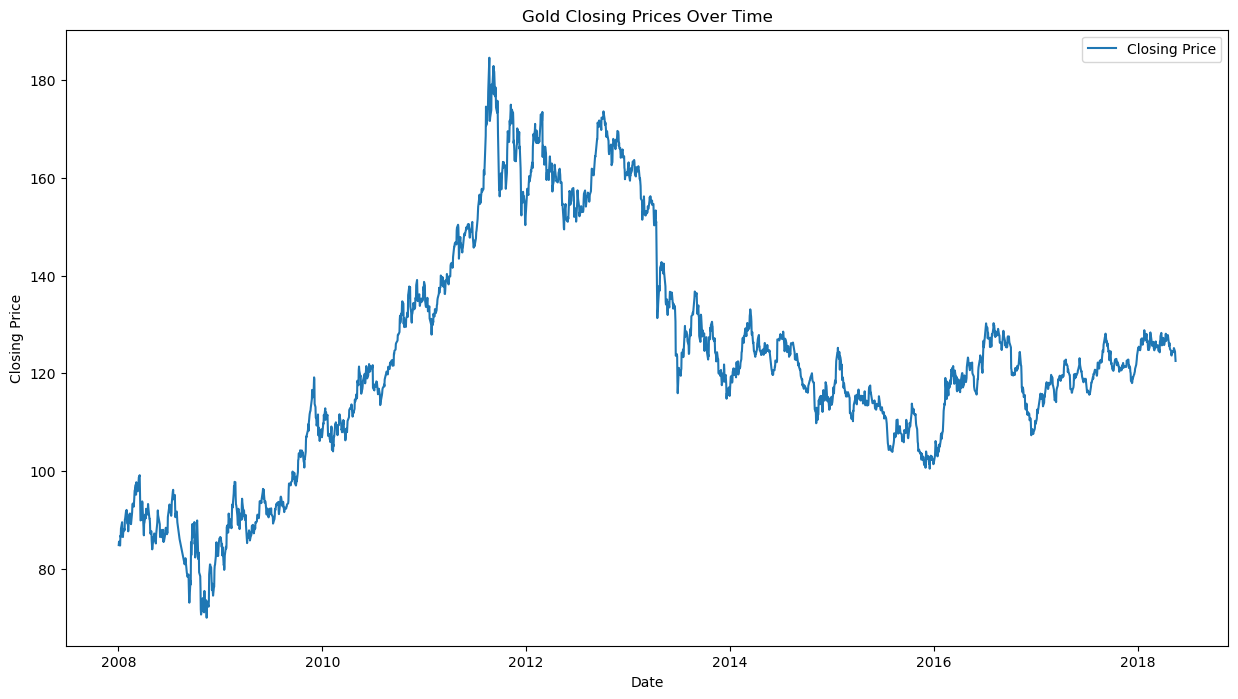

In [4]:
# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['GLD'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.legend()
plt.show()

In [5]:
# Create training and testing datasets
train_start_dt = '2008-01-01'
test_start_dt = '2017-01-01'
train = df.loc[train_start_dt:test_start_dt]
test = df.loc[test_start_dt:]
train.head()


,GLD
Date,
2008-01-02,84.860001
2008-01-03,85.570000
2008-01-04,85.129997
2008-01-07,84.769997
2008-01-08,86.779999


In [6]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [7]:
# Prepare the data for training
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(train_scaled, train_scaled, TIME_STEPS)
X_test, y_test = create_dataset(test_scaled, test_scaled, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1980, 5, 1) (1980, 1)
(300, 5, 1) (300, 1)


In [8]:
# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

In [9]:
#svr = SVR(kernel='rbf')

In [10]:
# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2)


In [11]:
# Fit the model to the training data
grid_search.fit(X_train.reshape(X_train.shape[0], -1), y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ...C=0.1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=0.1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=0.1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=0.1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=0.1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=0.1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ...........C=0.1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=0.1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=0.1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=0.1, epsilon=0

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ...C=0.1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsi

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=0.1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, eps

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=0.1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, eps

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=0.1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, e

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=0.1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=0.1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, eps

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=0.1, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=0.1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsi

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=0.1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsi

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ..........C=1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ...........C=1, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ...........C=1, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ..........C=1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END .............C=1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .............C=1, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=1, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....C=1, epsilon=0

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, eps

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, eps

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=1, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END .............C=1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=1, epsil

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=1, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsi

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......C=1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......C=1, epsilon

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=1, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ............C=1, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=1, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=1, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=1, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=1, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=1, epsilo

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..............C=1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, 

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ..............C=1, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ..........C=1, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsi

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=10, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=10, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=10, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=10, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....C=10, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=10, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=10, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=10, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ..........C=10, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=10, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=10, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=10, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ..........C=10, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=10, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=10, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=10, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=10, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=10, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....C=10, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=10, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=10, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=10, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=10, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=10, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=10, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, eps

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=10, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=10, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=10, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=10, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=10, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=10, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=10, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=10, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=10, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....C=10, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=10, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=10, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, eps

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=10, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=10, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ........C=10, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=10, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=10, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=10, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=10, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...........C=10, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilo

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=10, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .......C=10, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=10, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........C=10, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .............C=10, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=10, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=10, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=10, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............C=10, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=10, epsi

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=10, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=10, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=10, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........C=10, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsi

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=100, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.2s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=100, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.6s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=100, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.4s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=100, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.5s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=100, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.5s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.3s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.2s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.4s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.2s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ...C=100, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=100, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=100, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=100, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=100, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.2s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.6s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.4s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.5s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.5s
[CV] END ........C=100, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=100, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=100, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=100, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.2s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.6s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.4s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.5s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END .........C=100, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=100, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=100, epsilon=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.2s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.6s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.4s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.5s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=100, epsilon=0.01, gamma=0.5, kernel=linear; total time=   0.5s
[CV] END .........C=100, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=100, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=100, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.1s
[CV] END .........C=100, epsilon=0.01, gamma=0.5, kernel=rbf; total time=   0.1s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.01, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=100, epsilon=0.01, gamma=1, kernel=linear; total time=   0.2s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=100, epsilon=0.01, gamma=1, kernel=linear; total time=   0.6s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=100, epsilon=0.01, gamma=1, kernel=linear; total time=   0.4s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=100, epsilon=0.01, gamma=1, kernel=linear; total time=   0.5s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=100, epsilon=0.01, gamma=1, kernel=linear; total time=   0.5s
[CV] END ...........C=100, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.1s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........C=100, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........C=100, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.1s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........C=100, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........C=100, epsilon=0.01, gamma=1, kernel=rbf; total time=   0.1s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=100, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=100, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=100, epsilon=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=100, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=100, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=100, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=100, epsilon=0.05, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...C=100, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=100, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ...C=100, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=100, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=100, epsilon=0.05, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=100, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=100, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.05, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=100, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=100, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=100, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.05, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.05, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=100, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.05, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=100, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=100, epsilon=0.05, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........C=100, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=100, epsilon=0.05, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......C=100, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=100, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=100, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=100, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, epsilon=0.05, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....C=100, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ....C=100, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .........C=100, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .....C=100, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......C=100, epsilo

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=100, epsilon=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END .......C=100, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .......C=100, epsilon=0.1, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ......C=100, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ......C=100, epsilon=0.1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=100, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=100, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=100, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=100, epsilon=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=100, 

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=100, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........C=100, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] END ........C=100, epsilon=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=100, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=100, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=100, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....C=100, epsilon=0.5, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=100, epsilon=

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.05, 0.1, 0.5],
                         'gamma': ['scale', 'auto', 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=2)

In [12]:
# Display the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [22]:
# SVR model
model = SVR(kernel='linear', gamma= 'scale', C=10, epsilon=0.01)

# Fit the model
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.01, kernel='linear')

In [23]:
# Make predictions
train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse scaling 1 chiều thành 2d
train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [24]:
# Evaluate the model with additional metrics
# MSE
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)

# RMSE
rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

# MAE
mae_train = mean_absolute_error(y_train_inv, train_pred_inv)
mae_test = mean_absolute_error(y_test_inv, test_pred_inv)

# MAPE
mape_train = np.mean(np.abs((y_train_inv - train_pred_inv) / y_train_inv)) * 100
mape_test = np.mean(np.abs((y_test_inv - test_pred_inv) / y_test_inv)) * 100

# R-squared
r2_train = r2_score(y_train_inv, train_pred_inv)
r2_test = r2_score(y_test_inv, test_pred_inv)

# Print the evaluation metrics
print("Training Data:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Data:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"R-squared (R²): {r2_test}")


Training Data:
Mean Squared Error (MSE): 2.6243456768076334
Root Mean Squared Error (RMSE): 1.6199832334958388
Mean Absolute Error (MAE): 1.1106024871261415
Mean Absolute Percentage Error (MAPE): 0.93%
R-squared (R²): 0.9957696540679369

Testing Data:
Mean Squared Error (MSE): 0.6693503118766976
Root Mean Squared Error (RMSE): 0.8181383207482079
Mean Absolute Error (MAE): 0.6409599417421911
Mean Absolute Percentage Error (MAPE): 0.53%
R-squared (R²): 0.9544365496689183


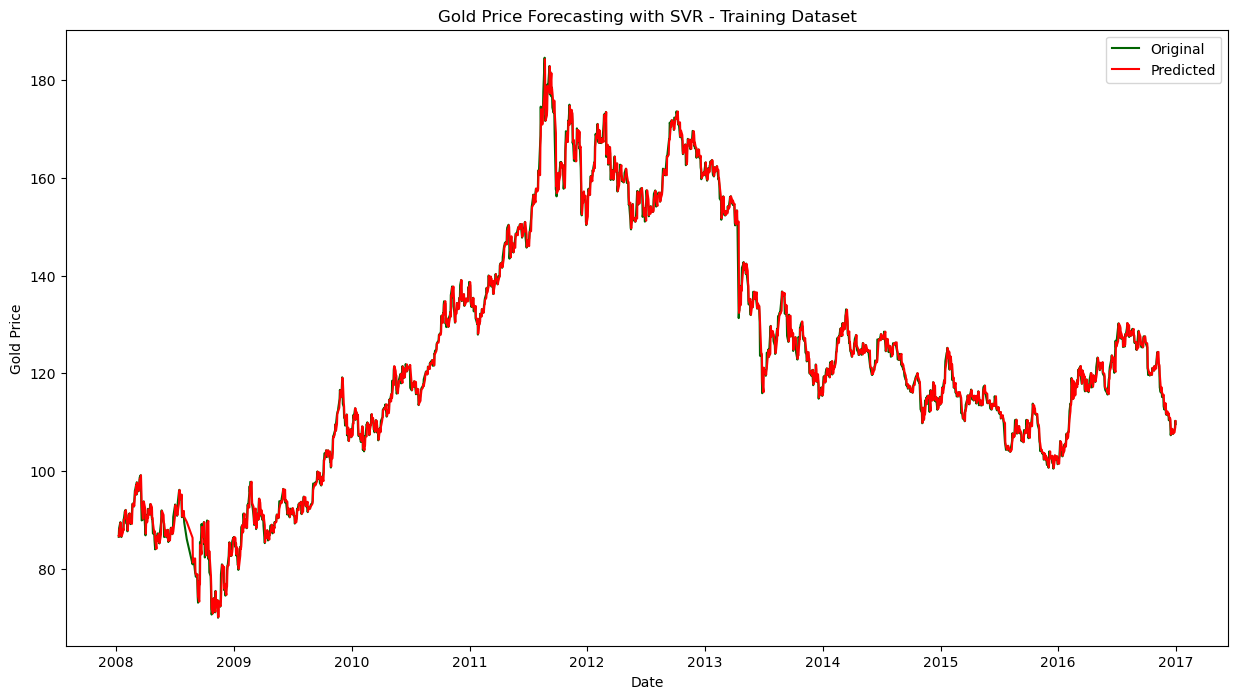

In [25]:
# Plotting the results for train dataset
plt.figure(figsize=(15, 8))
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Forecasting with SVR - Training Dataset')
plt.legend()
plt.show()

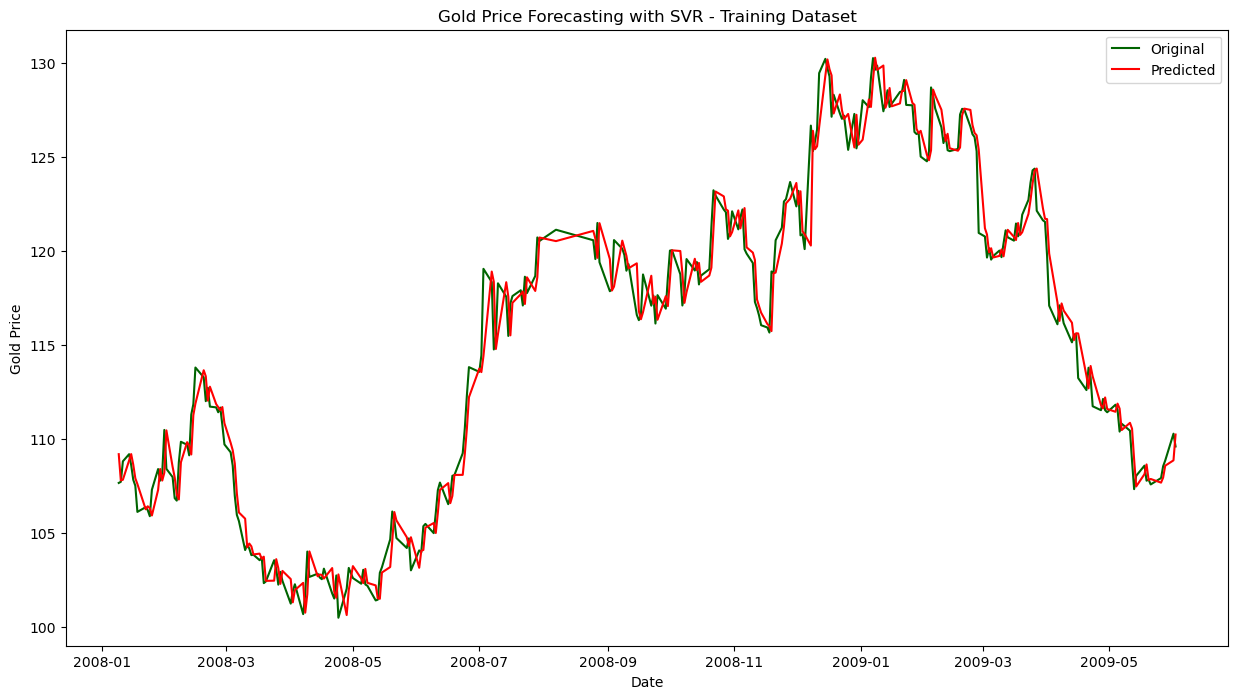

In [26]:
# Plotting the results for train dataset
plt.figure(figsize=(15, 8))
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv[-300:])], y_train_inv[-300:], label='Original', color='darkgreen')
plt.plot(df.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv[-300:])], train_pred_inv[-300:], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Forecasting with SVR - Training Dataset')
plt.legend()
plt.show()

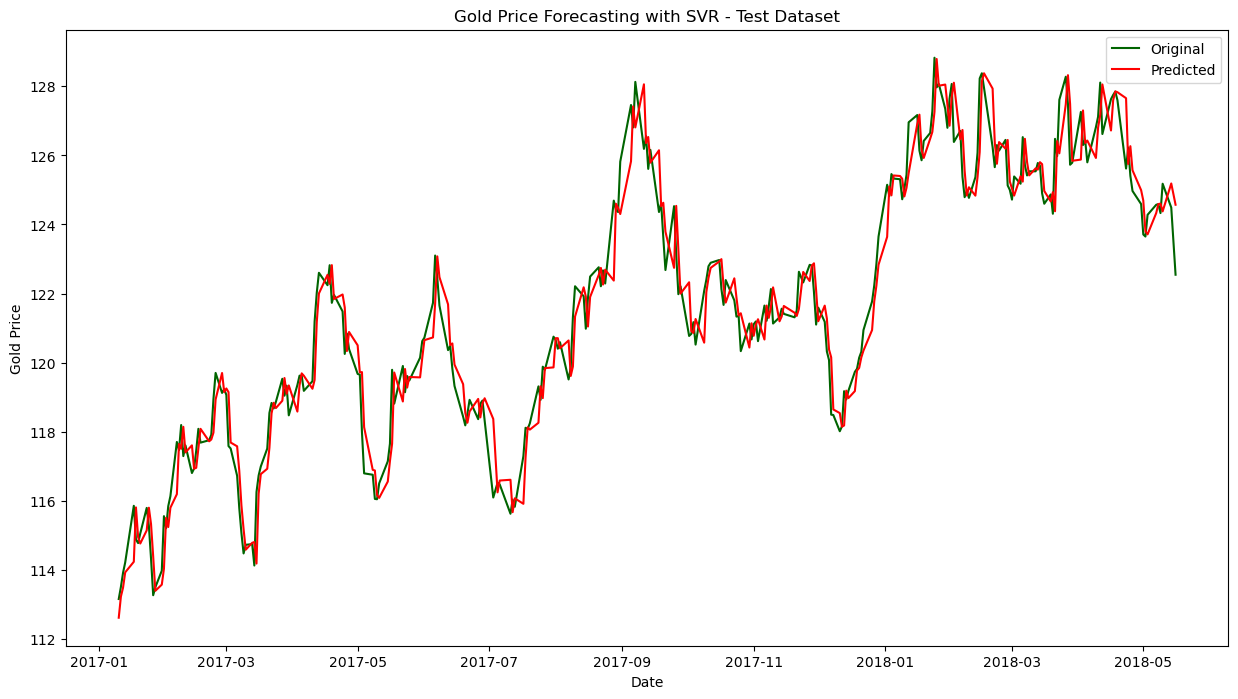

In [27]:
# Plotting the results for test dataset
plt.figure(figsize=(15, 8))
plt.plot(df.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS:], y_test_inv, label='Original', color='darkgreen')
plt.plot(df.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS:], test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

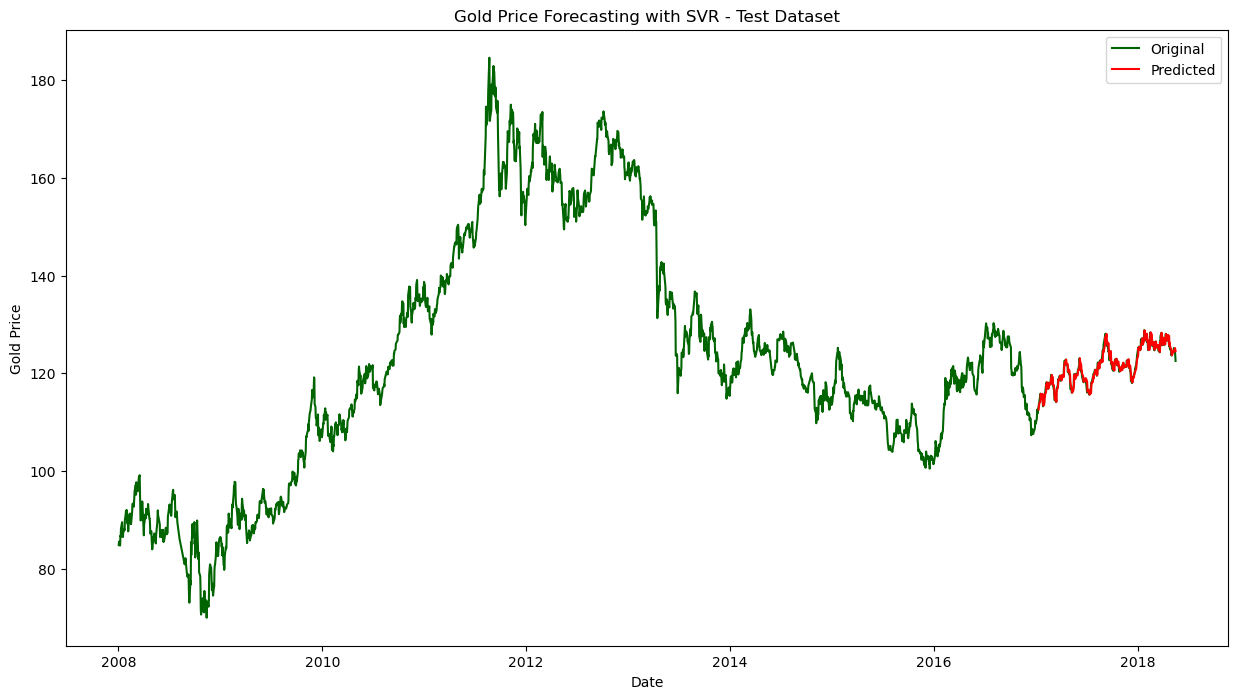

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['GLD'], label='Original', color='darkgreen')
plt.plot(df.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS:], test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

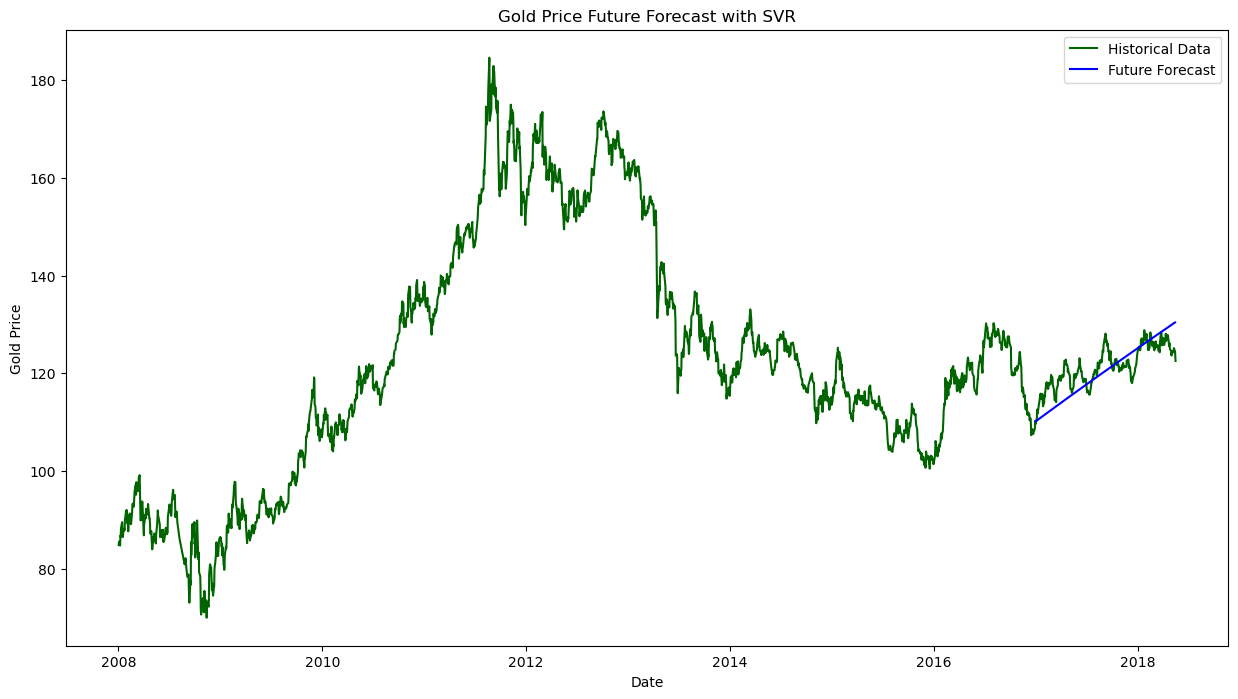

In [29]:
# Number of future time steps to forecast
future_steps = 500 # Adjust this as needed

# Last `TIME_STEPS` values from the test set to start forecasting
#last_sequence = X_test[-1]
last_sequence = X_train[-1]
# Forecast future values
future_forecast = []
for _ in range(future_steps):
    # Predict next value based on the last sequence
    next_pred = model.predict(last_sequence.reshape(1, -1))
    future_forecast.append(next_pred[0])
    # Update the last sequence by removing the first element and adding the predicted value
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse scaling for future forecast
future_forecast_inv = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Generate future timestamps
#last_date = df.index[-1]
last_date = train.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps+1, freq='D')[1:]

# Plotting the future forecast
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['GLD'], label='Historical Data', color='darkgreen')
plt.plot(future_dates, future_forecast_inv, label='Future Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Future Forecast with SVR')
plt.legend()
plt.show()
